In [33]:
# linear algebra
import numpy as np

#Common model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection, model_selection, metrics
from sklearn.model_selection import ShuffleSplit

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

#Data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Configure Visualization Defaults
# %matplotlib inline = show plots in jupyter notebook browset
# mpl.style.use('ggplot')
# sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8

-------------------------


# 1- Question or problem definition

### - Getting data

In [34]:
import pandas as pd

sub_df = pd.read_csv("titanic_test.csv")
df = pd.read_csv("titanic_train.csv")
# df = pd.concat([train_df, test_df])

df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [35]:
print('Description statistics of the train_df:\n')
df.describe(include='all')

Description statistics of the train_df:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
sub_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [38]:
df.shape, sub_df.head

((891, 12),
 <bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
 0            892       3                              Kelly, Mr. James   
 1            893       3              Wilkes, Mrs. James (Ellen Needs)   
 2            894       2                     Myles, Mr. Thomas Francis   
 3            895       3                              Wirz, Mr. Albert   
 4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
 ..           ...     ...                                           ...   
 413         1305       3                            Spector, Mr. Woolf   
 414         1306       1                  Oliva y Ocana, Dona. Fermina   
 415         1307       3                  Saether, Mr. Simon Sivertsen   
 416         1308       3                           Ware, Mr. Frederick   
 417         1309       3                      Peter, Master. Michael J   
 
         Sex   Age  SibSp  Parch              Ticket    

# 2- Wrangle, prepare, cleanse the data

We need to make sure the data is clean before starting your analysis. As a reminder, we should check for:

Duplicate records, Consistent formatting, Missing values, Obviously wrong values (x)

### - Duplicate records

In [39]:
# Finding the number duplicate record
print('df - Number of duplicate Record:', df.duplicated().sum())

print('sub_df - Number of duplicate Record:', sub_df.duplicated().sum())

df - Number of duplicate Record: 0
sub_df - Number of duplicate Record: 0


### - Missing Values

In [40]:
# Find the number of null per each columns
print('Columns in df with null values:\n')
print(df)
print("-"*30)

print('Columns in sub_df with null values:\n')
print(sub_df.isnull().sum())
print("-"*30)

Columns in df with null values:

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                  

In [41]:
combine = [df, sub_df]

### - Converting a categorical feature

converting features which contain strings to numerical values. Required by most model algorithms.

In [42]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0,}).astype(int)
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### Handle missing value - numerical continuous variable

start estimating and completing features with missing or null values. We will first do this for the Age feature.

consider three methods to complete a numerical continuous feature. :

1 - A simple way is to generate random numbers between mean and standard deviation.

2 - More accurate way of guessing missing values is to use other correlated features. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations.

3 - Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

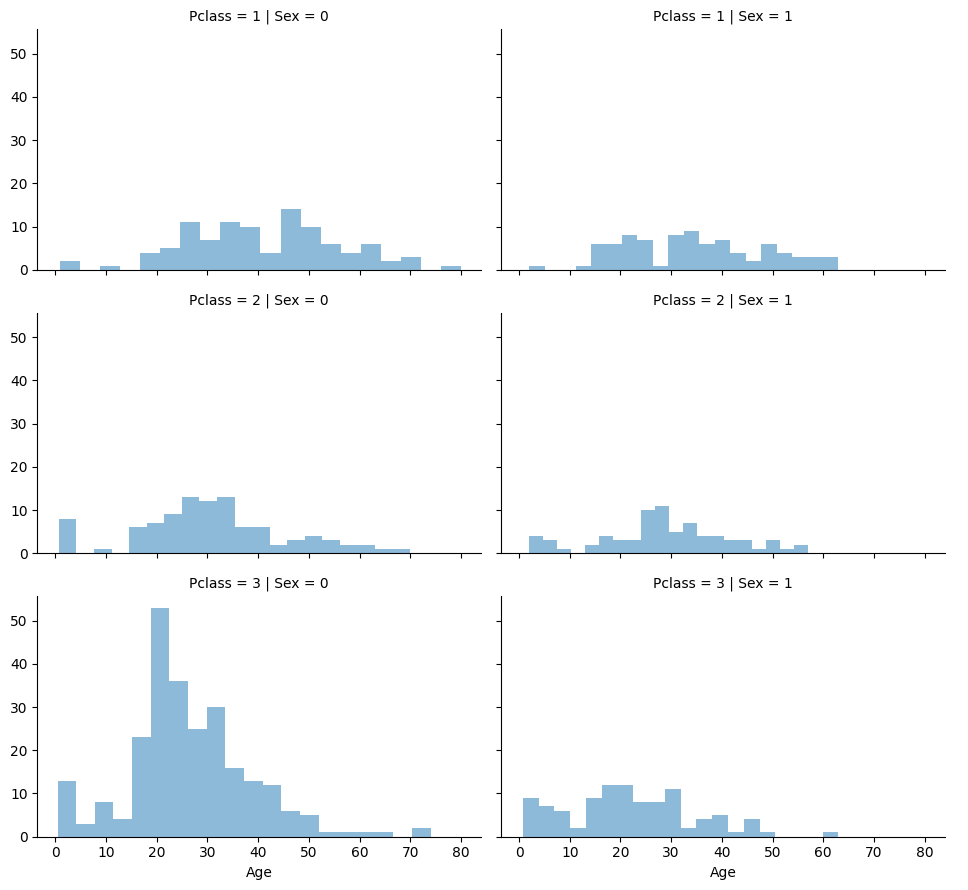

In [43]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

 preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [44]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [45]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean = age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5+0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)
            
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


### Handle missing value - categorical variable

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [46]:
# Find the value count of train_df['Embarked']
print('Value count of Embarked variable in train_df:\n')
print(df['Embarked'].value_counts())
print("-"*30)

# Find the mode of train_df['Embarked']
freq_port = df.Embarked.dropna().mode()[0]
print("Mode of Embarked variable in train_df: ", freq_port)

Value count of Embarked variable in train_df:

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
------------------------------
Mode of Embarked variable in train_df:  S


In [47]:
# Fill the null value of Embarked with the most common occurances

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [48]:
# Converting categorical feature to numeric

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':1,'C':2,'Q':3})
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,1


### - Handle missing value in Fare

Fare feature is fractional value. Our training dataset has one missing values. We simply fill these with the mean.

In [49]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().mean(), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(np.int64)

### - Creating new feature extracting from existing (Add Computed Column)

analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

OBSERVATIONS

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

DECISION

We decide to retain the new Title feature for model training.

In [50]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [51]:
pd.crosstab(df['Title'], sub_df['Sex'])

Sex,0,1
Title,,
Don,1,0
Dr,3,0
Master,14,9
Miss,64,37
Mme,1,0
Mr,145,83
Mrs,37,21
Rev,1,2


In [52]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [53]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5})
    dataset['Title'] = dataset['Title'].fillna(0)
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1


### - Handling missing value - Highly incomplete (Cabin)

A computed column, Deck, is created because it is slightly mroe general than Cabin

In [54]:
for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str.slice(0,1)
    dataset['Deck'] = dataset['Deck'].map({"A":1, "B":2, "C":3, "D":4, "E":5, "F":5, "G":6, "T":8})
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(np.int64)

In [55]:
# Find the number of null per each columns

print('Columns in df with null values:\n')
print(df.isnull().sum())
print("-"*30)

print("Columns in sub_df with null values:\n")
print(sub_df.isnull().sum())
print("-"*30)

Columns in df with null values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------
Columns in sub_df with null values:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Deck             0
dtype: int64
------------------------------


### - Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [56]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [57]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1   

### - Drop Useless Column

The Name, PassengerId, Ticket and Cabin should not have a bearing on the analysis. We also do not need the PassengerId feature in the training dataset

In [58]:
# Duplicate variable = Fare * Age
# for dataset in combine:
#   dataset['FareB] = dataset['Fare']
#   dataset['AgeB'] = dataset['Age']

In [59]:
# Binning variable - Fare & Age
for dataset in combine:
    # Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-doc/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    # Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [60]:
# for dataset in combine:
#     dataset.loc[dataset['FareB'] <= 7.91, 'FareB'] = 0
#     dataset.loc[(dataset['FareB'] > 7.91) & (dataset['FareB'] <= 14.454), 'FareB'] = 1
#     dataset.loc[(dataset['FareB'] > 14.454) & (dataset['FareB'] <= 31), 'FareB'] = 2
#     dataset.loc[dataset['FareB'] > 31, 'FareB'] = 3
#     dataset['FareB'] = dataset['FareB'].astype(int)

combine = [df, sub_df]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]"
5,6,0,3,"Moran, Mr. James",0,25,0,0,330877,8,NaN,3,1,0,1,1,"(7.0, 14.0]","(16.0, 32.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51,E46,1,1,5,1,1,"(31.0, 512.0]","(48.0, 64.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21,NaN,1,4,0,5,0,"(14.0, 31.0]","(-0.08, 16.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11,NaN,1,3,0,3,0,"(7.0, 14.0]","(16.0, 32.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30,NaN,2,3,0,2,0,"(14.0, 31.0]","(-0.08, 16.0]"


In [61]:
for dataset in combine:
    # Fare Bin/Buckets using qcut or frequency bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    #Age Bins/Buckets using cut or value bins:
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [62]:
# for dataset in combine:
#     dataset.loc[dataset['AgeB'] <= 16, 'AgeB'] = 0
#     dataset.loc[(dataset['AgeB'] > 16) & (dataset['AgeB'] <= 32), 'AgeB'] = 1
#     dataset.loc[(dataset['AgeB'] > 32) & (dataset['AgeB'] <= 48), 'AgeB'] = 2
#     dataset.loc[(dataset['AgeB'] > 48) & (dataset['AgeB'] <= 64), 'AgeB'] = 3
#     dataset.loc[dataset['AgeB'] > 64, 'AgeB'] = 4
    
# train_df.head()    

combine = [df, sub_df]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]"


### - Convert Formats

converting categorical data to dummy variables for mathematical analysis. There are multiple wats to encode to categorical variables; we will use the sklearn and pandas functions.

here we will also define our x(independent/features/explanatory/predictor/etc..) and y(dependent/target/outcome/respone/etc..) variables for data modeling.

In [63]:
# CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

# code categorical data
label = LabelEncoder()
for dataset in combine:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
# define y variable aka target/outcome
Target = ['Survived']

# define x variables for original features aka feature selection
data1_x = ['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone']
# pretty name/values for charts

data1_x_calc = ['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']
# coded for algorithm calculated

data1_xy = Target + data1_x
print('Original X Y: ',data1_xy,'\n')


# define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclasss','Embarked_Code','Title_Code','FamilySize','AgeBin_Code','FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

# define x and y variables for dummy features original
data1_dummy = pd.get_dummies(df[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclasss', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 



,Sex,Pclass,Embarked,Title,SibSp,Parch,Age,Fare,FamilySize,IsAlone
0,0,3,1,1,1,0,22,7,2,0
1,1,1,2,3,1,0,38,71,2,0
2,1,3,1,2,0,0,26,7,1,1
3,1,1,1,3,1,0,35,53,2,0
4,0,3,1,1,0,0,35,8,1,1


In [64]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
sub_df = sub_df.drop(['Name','Ticket','Cabin'],axis=1)

combine = [df, sub_df]
df.shape, sub_df.shape 

((891, 19), (418, 19))

In [65]:
# Check for data type
print('Training Data:\n')
df.head()

Training Data:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,0,22,1,0,7,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]",0,0,0,1,0
1,1,1,1,38,1,0,71,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,1,2,2,3
2,1,3,1,26,0,0,7,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]",1,0,1,1,0
3,1,1,1,35,1,0,53,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,0,2,2,3
4,0,3,0,35,0,0,8,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]",0,0,0,2,1


In [66]:
# Check for data type
print('Testing Data: \n')
df.head()

Testing Data: 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,0,22,1,0,7,1,1,0,2,0,"(-0.001, 7.0]","(16.0, 32.0]",0,0,0,1,0
1,1,1,1,38,1,0,71,2,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,1,2,2,3
2,1,3,1,26,0,0,7,1,2,0,1,1,"(-0.001, 7.0]","(16.0, 32.0]",1,0,1,1,0
3,1,1,1,35,1,0,53,1,3,3,2,0,"(31.0, 512.0]","(32.0, 48.0]",1,0,2,2,3
4,0,3,0,35,0,0,8,1,1,0,1,1,"(7.0, 14.0]","(32.0, 48.0]",0,0,0,2,1


# 3 - EDA (Exploratory Data Analysis) - Analyze, identify patterns, and explore the data Analysis

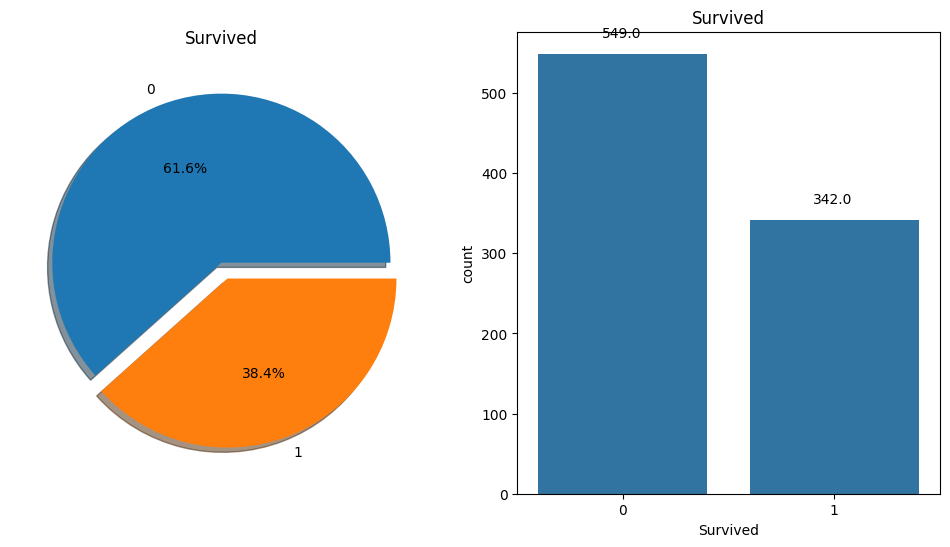

In [77]:
import matplotlib.pyplot as plt

# Survived rate

# Pie Chart
f,ax = plt.subplots(1,2, figsize=(12,6))
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Bar Chart = count
sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')
for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))
    
plt.show()



In [79]:
eda_df = df.copy()
eda_df['Sex'] = eda_df['Sex'].map({0:'male',1:'female'})
eda_df['Deck'] = eda_df['Deck'].map({0:'Missing',1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'T'})
eda_df['Embarked'] = eda_df['Embarked'].map({0:'Missing',1:'S',2:'C',3:'Q'})
eda_df['Title'] = eda_df['Title'].map({0:'Missing',1:'Mr',2:'Miss',3:'Mrs',4:'Master',5:'Rare'})

#eda_df['Survived'] = eda_df['Survived'].map({0:'No',1:'Yes'})

eda_df['Pclass'] = eda_df['Pclass'].map({0:'Missing',1:'Upper',2:'Middle',3:'Lower'})
eda_df['IsAlone'] = eda_df['IsAlone'].map({0:'No',1:'Yes'})

In [101]:
import seaborn as sns

fig1 = eda_df.groupby(['Sex', 'Survived'])['Survived'].count().unstack().fillna(0)
fig2 = eda_df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack().fillna(0)
fig3 = eda_df.groupby(['IsAlone', 'Survived'])['Survived'].count().unstack().fillna(0)
fig4 = eda_df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack().fillna(0)

In [115]:


colors = ['#2471A3', '#F5B041']

def stacked_barchart(fig,ax):
    bottom = np.zeros(len(fig))

    for i, col in enumerate(fig.columns):
        ax.bar(fig.index, fig[col], bottom=bottom, label=str(col), color=colors[i])
        bottom += np.array(fig[col])

    totals = fig.sum(axis=1)
    y_offset = 4
    for i, total in enumerate(totals):
        ax.text(totals.index[i], total + y_offset, round(total), ha='center', weight='bold')
        
            
    # Let's put the annotations inside the bars themselves by using a
    # negative offset.
    y_offset = -40

    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
        ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.  
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height() + bar.get_y() + y_offset,
          # This is actual value we'll show.
          round(bar.get_height()),
          # Center the labels and style them a bit.
          ha='center',
          color='w',
          weight='bold',
          size=8
        )

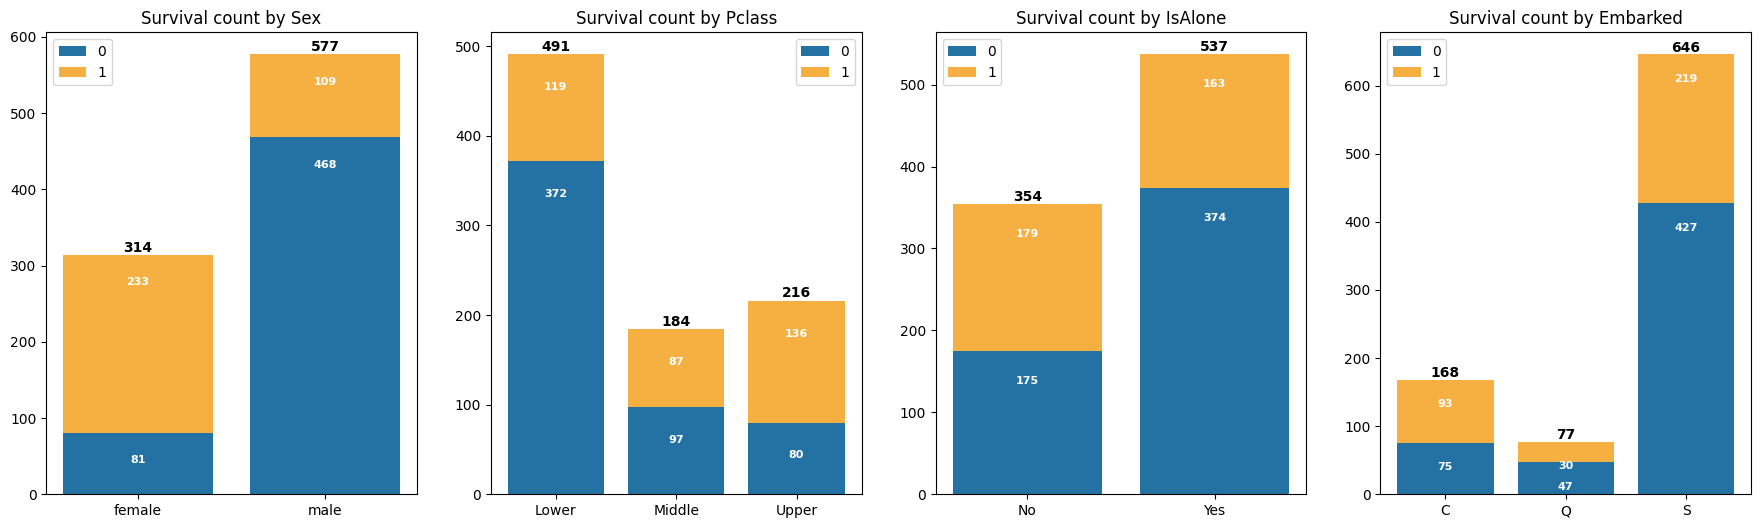

In [116]:
fig, ax = plt.subplots(1, 4, figsize=(22, 6))

stacked_barchart(fig1, ax[0])
ax[0].set_title('Survival count by Sex')
ax[0].legend()

stacked_barchart(fig2, ax[1])
ax[1].set_title('Survival count by Pclass')
ax[1].legend()

stacked_barchart(fig3, ax[2])
ax[2].set_title('Survival count by IsAlone')
ax[2].legend()

stacked_barchart(fig4, ax[3])
ax[3].set_title('Survival count by Embarked')
ax[3].legend()

plt.show()

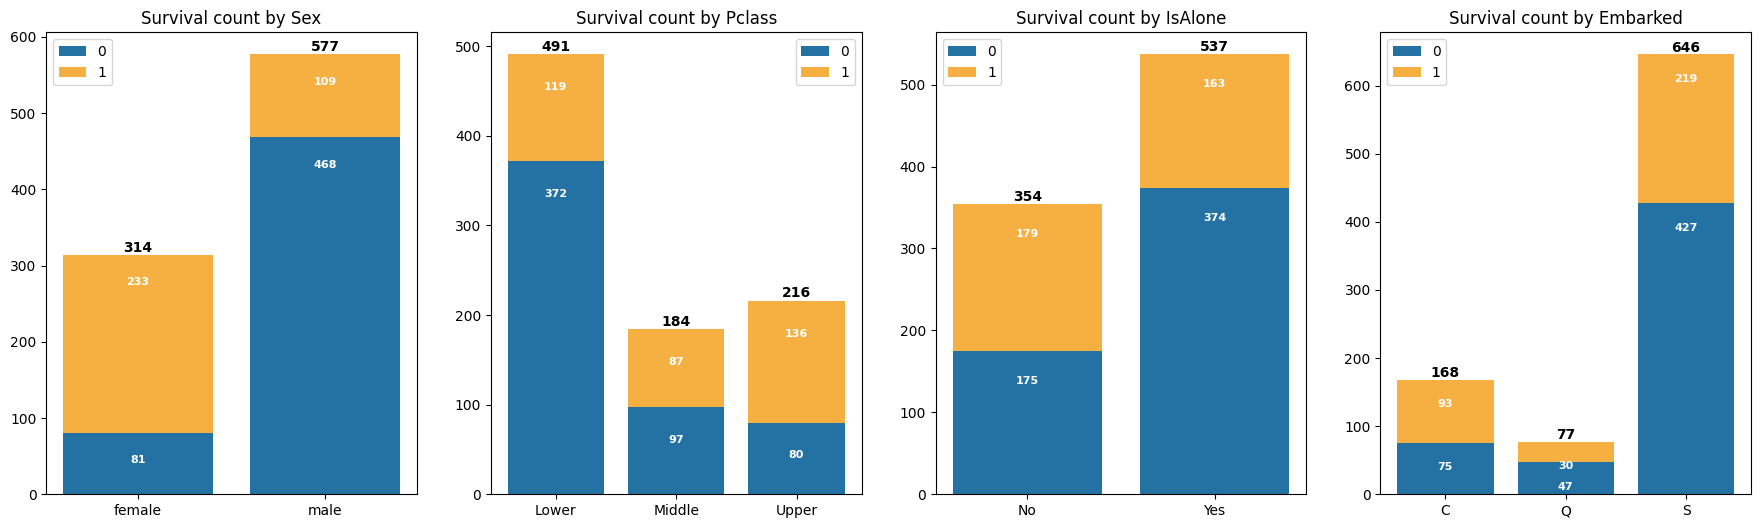

In [117]:
display(df[['AgeBin','Survived']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='Survived',ascending=False))

# Analyze FamilySize feature with survived
display(df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=False))

# Analyze Pclass feature with survived
display(df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False))

# Analyze sex feature with survived
display(df[["Sex","Survived"]].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False))

# Analyze SibSp feature with survived
display(df[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False))

# Analyze Parch feature with survived
display(df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False))

# Analyze IsAlone feature with survived
display(df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived',ascending=False))

,AgeBin,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
1,1,0.742038
0,0,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


SEX - The survival rates for a women on the ship is around 75% while that for men in around 19%.

Pclass - Passenegers Of Pclass 1 has a very high priority to survive. Pclass 1 %survived is around 63%, for Pclass2 is around 48%, and Pclass3 survived is around 25%

In [118]:
pd.crosstab([eda_df.Sex, eda_df.Survived], eda_df.Pclass, margins=True)

Pclass           Lower  Middle  Upper  All
Sex    Survived                           
female 0            72       6      3   81
       1            72      70     91  233
male   0           300      91     77  468
       1            47      17     45  109
All                491     184    216  891

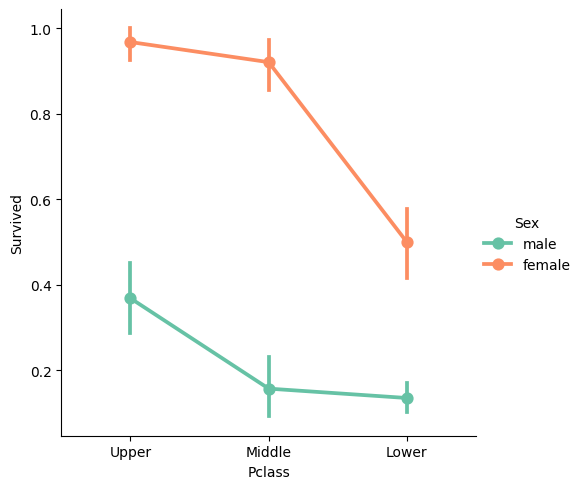

In [126]:

sns.catplot(x = 'Pclass',y ='Survived', hue='Sex',data=eda_df, palette='Set2', kind='point', order=['Upper','Middle','Lower'])
plt.show()

- Female from Upper class is about 95-96% survived. Only 3 out of 94 Women from Upper class died.

- Lower class female has more survived rate than Upper class male.

### - Features Correlation with Survived:

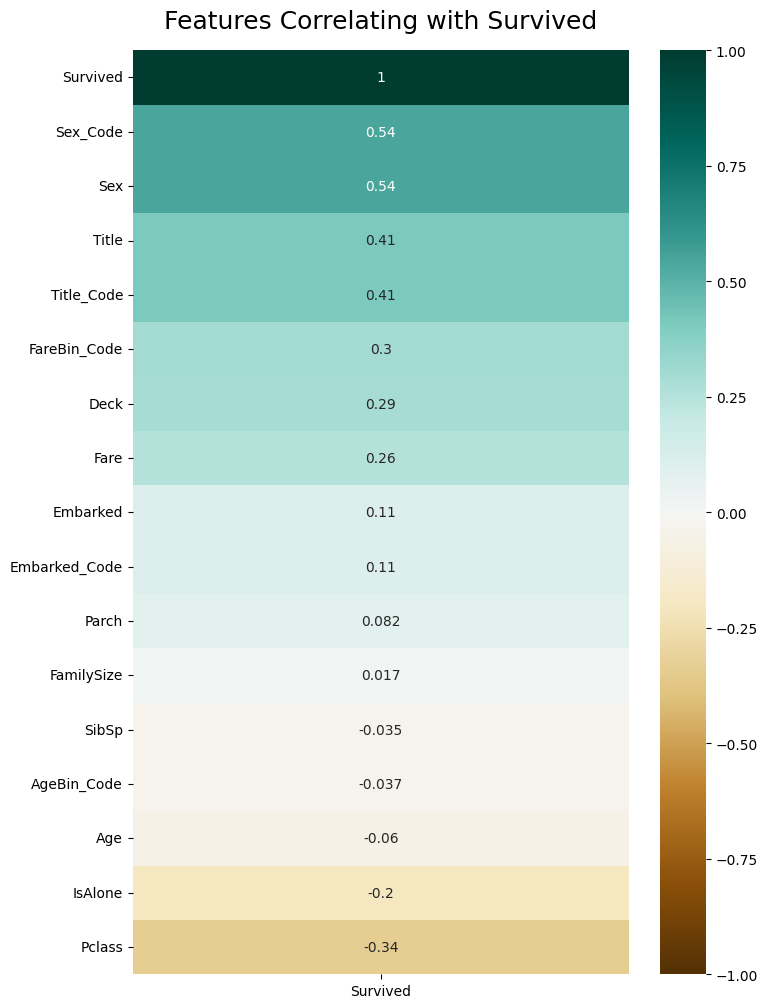

In [136]:
# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix, then isolate and sort the 'Survived' column
corr_matrix = numeric_df.corr()[['Survived']].sort_values(by='Survived', ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize': 18}, pad=16)

plt.show()


- Sex is positively corrlated with Survived (with a Person's correlation coefficient of 0.54) ; Female is more likely to survive

- Pclass is negatively correlated with Survived(with a Pearson’s correlation coefficient of -0.34) ; Obviously, better the ticket class (1 = 1st/Upper ; 2 = 2nd/Middle; 3 = 3rd/Lower), higher the chance of survival.


### - Correlation between features:

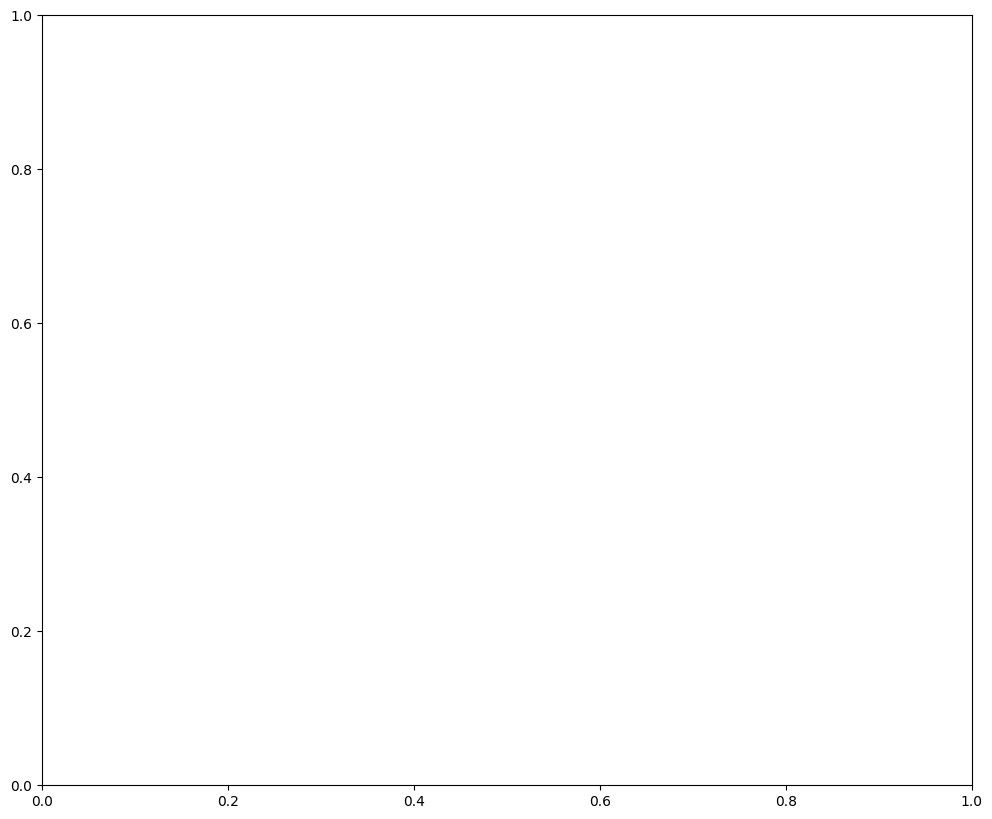

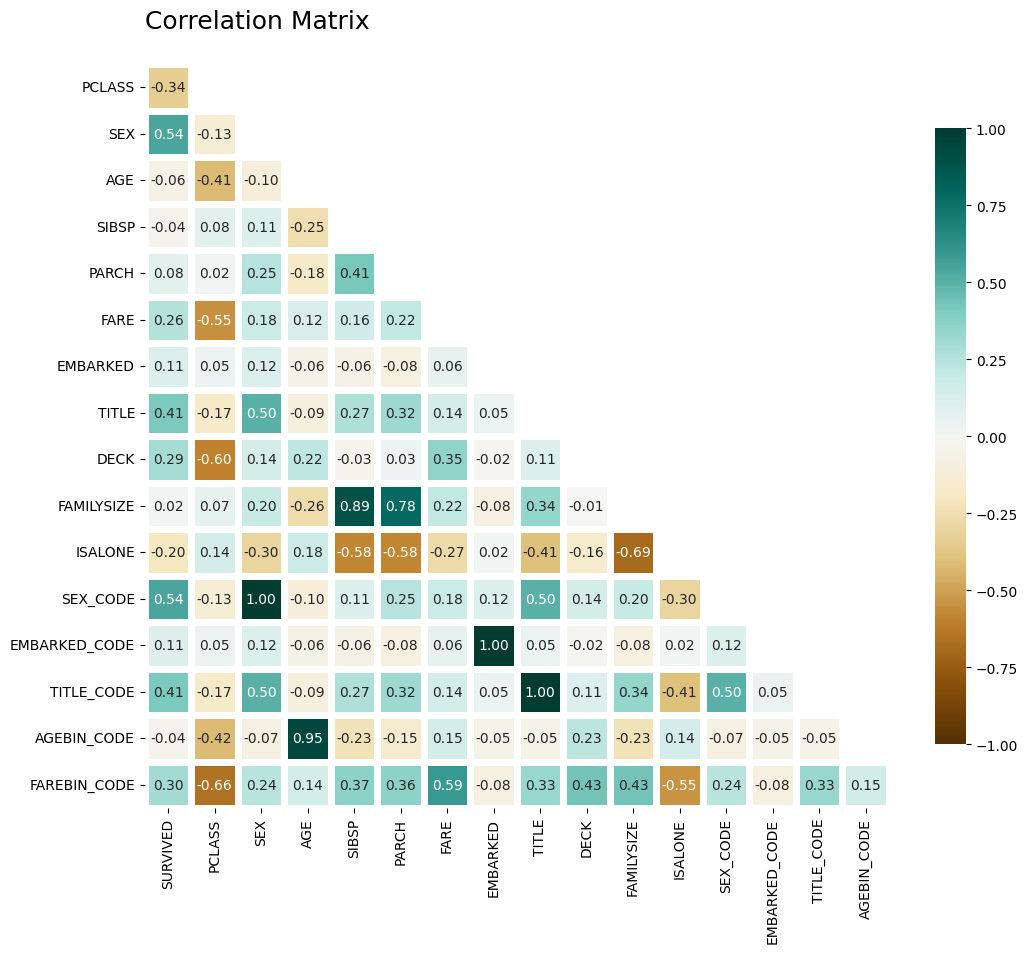

In [143]:
# Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# get correlations
df_corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(12,10))

# mask
mask = np.triu(np.ones_like(df_corr, dtype = bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
# cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

fig, ax = plt.subplots(figsize=(12, 10))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap='BrBG', vmin=-1, vmax=1, cbar_kws={'shrink':.8}, square=True)

# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# title
title = 'Correlation Matrix\n'
plt.title(title, loc='left', fontsize=18)
plt.show()


According to the analysis, passengers were more likely to survive if:

- they had a high class ticket
- they were women
- they were young
- they embarked from Cherbourg

In [144]:
df = df.drop(['AgeBin'], axis=1)
df = df.drop(['FareBin'], axis=1)
sub_df = sub_df.drop(['AgeBin'], axis = 1)
sub_df = sub_df.drop(['FareBin'], axis = 1)

# 4 - Acquire training and testing data 

In [145]:
X_train = df.drop('Survived', axis = 1)
Y_train = df['Survived']
X_test = sub_df.drop('PassengerId', axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 16), (891,), (418, 16))

# 5 - Model, Predict and solve the problem